<a href="https://colab.research.google.com/github/ExplorerGumel/logistics-regression-from-scratch/blob/main/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTICS REGRESSION IMPLEMENTATION FROM SCRATCH

Welcome to this notebook, where we embark on the journey of comprehending the intricacies of the **Logistic Regression** model, all without the reliance on external libraries such as Scikit-learn. While Scikit-learn undeniably offers a rapid implementation approach, the importance of comprehending the inner mechanics of the models we employ cannot be overstated. This understanding empowers us to grasp the underlying assumptions, limitations, and subtleties of the algorithm, enabling us to make informed decisions during the modeling process. By gaining a comprehensive understanding of Logistic Regression's core principles, including the concepts of the sigmoid function, decision boundary, and the impact of various parameters, we can fine-tune its configurations and identify contexts where it excels or demands adjustments.

Logistic Regression boasts a rich legacy in statistics, with its origins tracing back to the mid-20th century. Its versatility and interpretability have contributed to its widespread adoption in various fields, including medicine, economics, and social sciences. This model serves as a pivotal tool for binary classification problems, providing a robust foundation for more complex machine learning techniques. In this notebook, we will unravel the fundamental concepts behind this powerful tool, demystifying its implementation step by step.

Logistic Regression operates on the principle of estimating the probability of a binary outcome based on one or more predictor variables. Through the utilization of the sigmoid function, it maps input values to a range between 0 and 1, effectively allowing us to discern the likelihood of a particular event.

The logistic regression model's objective is to find the best-fitting decision boundary that segregates the data points according to their respective classes. This is achieved by minimizing the differences between the predicted probabilities and the actual binary outcomes, thereby determining the optimal weights and bias.


<img src="logistic-regression.png" style="width:400px;">

A simple logistic regression model can be represented as:


 \hat\{y}\ = \sigma(wx + b)

where \hat{y} represents the predicted probability of the binary outcome \(y\), determined by the input variable \x\) and governed by the logistic function, with \w denoting the weight and \b the bias.

Given a set of training data points \((x_1, y_1)\), ..., \((x_m, y_m)\), the objective is to find the "best" decision boundary, characterized by the most suitable parameters \(w\) and \(b\), ensuring that the disparity between the actual binary outcomes \(y_i\) and the predicted probabilities \(\hat{y}_i = \sigma(wx_i + b)\) is minimized.

A simple logistic regression model can be represented as:


\hat{y} = \sigma\(wx + b)

$$a = \sigma\left(wx + b)


where \hat{y} represents the predicted probability of the binary outcome \(y\), determined by the input variable \x and governed by the logistic function, with \w denoting the weight and \b the bias.

Given a set of training data points \((x_1, y_1)\), ..., \((x_m, y_m)\), the objective is to find the "best" decision boundary, characterized by the most suitable parameters \(w\) and \(b\), ensuring that the disparity between the actual binary outcomes \(y_i\) and the predicted probabilities \(\hat{y}_i = \sigma(wx_i + b)\) is minimized.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:\ML DATASETS\water-portability-classification\Train.csv")
data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


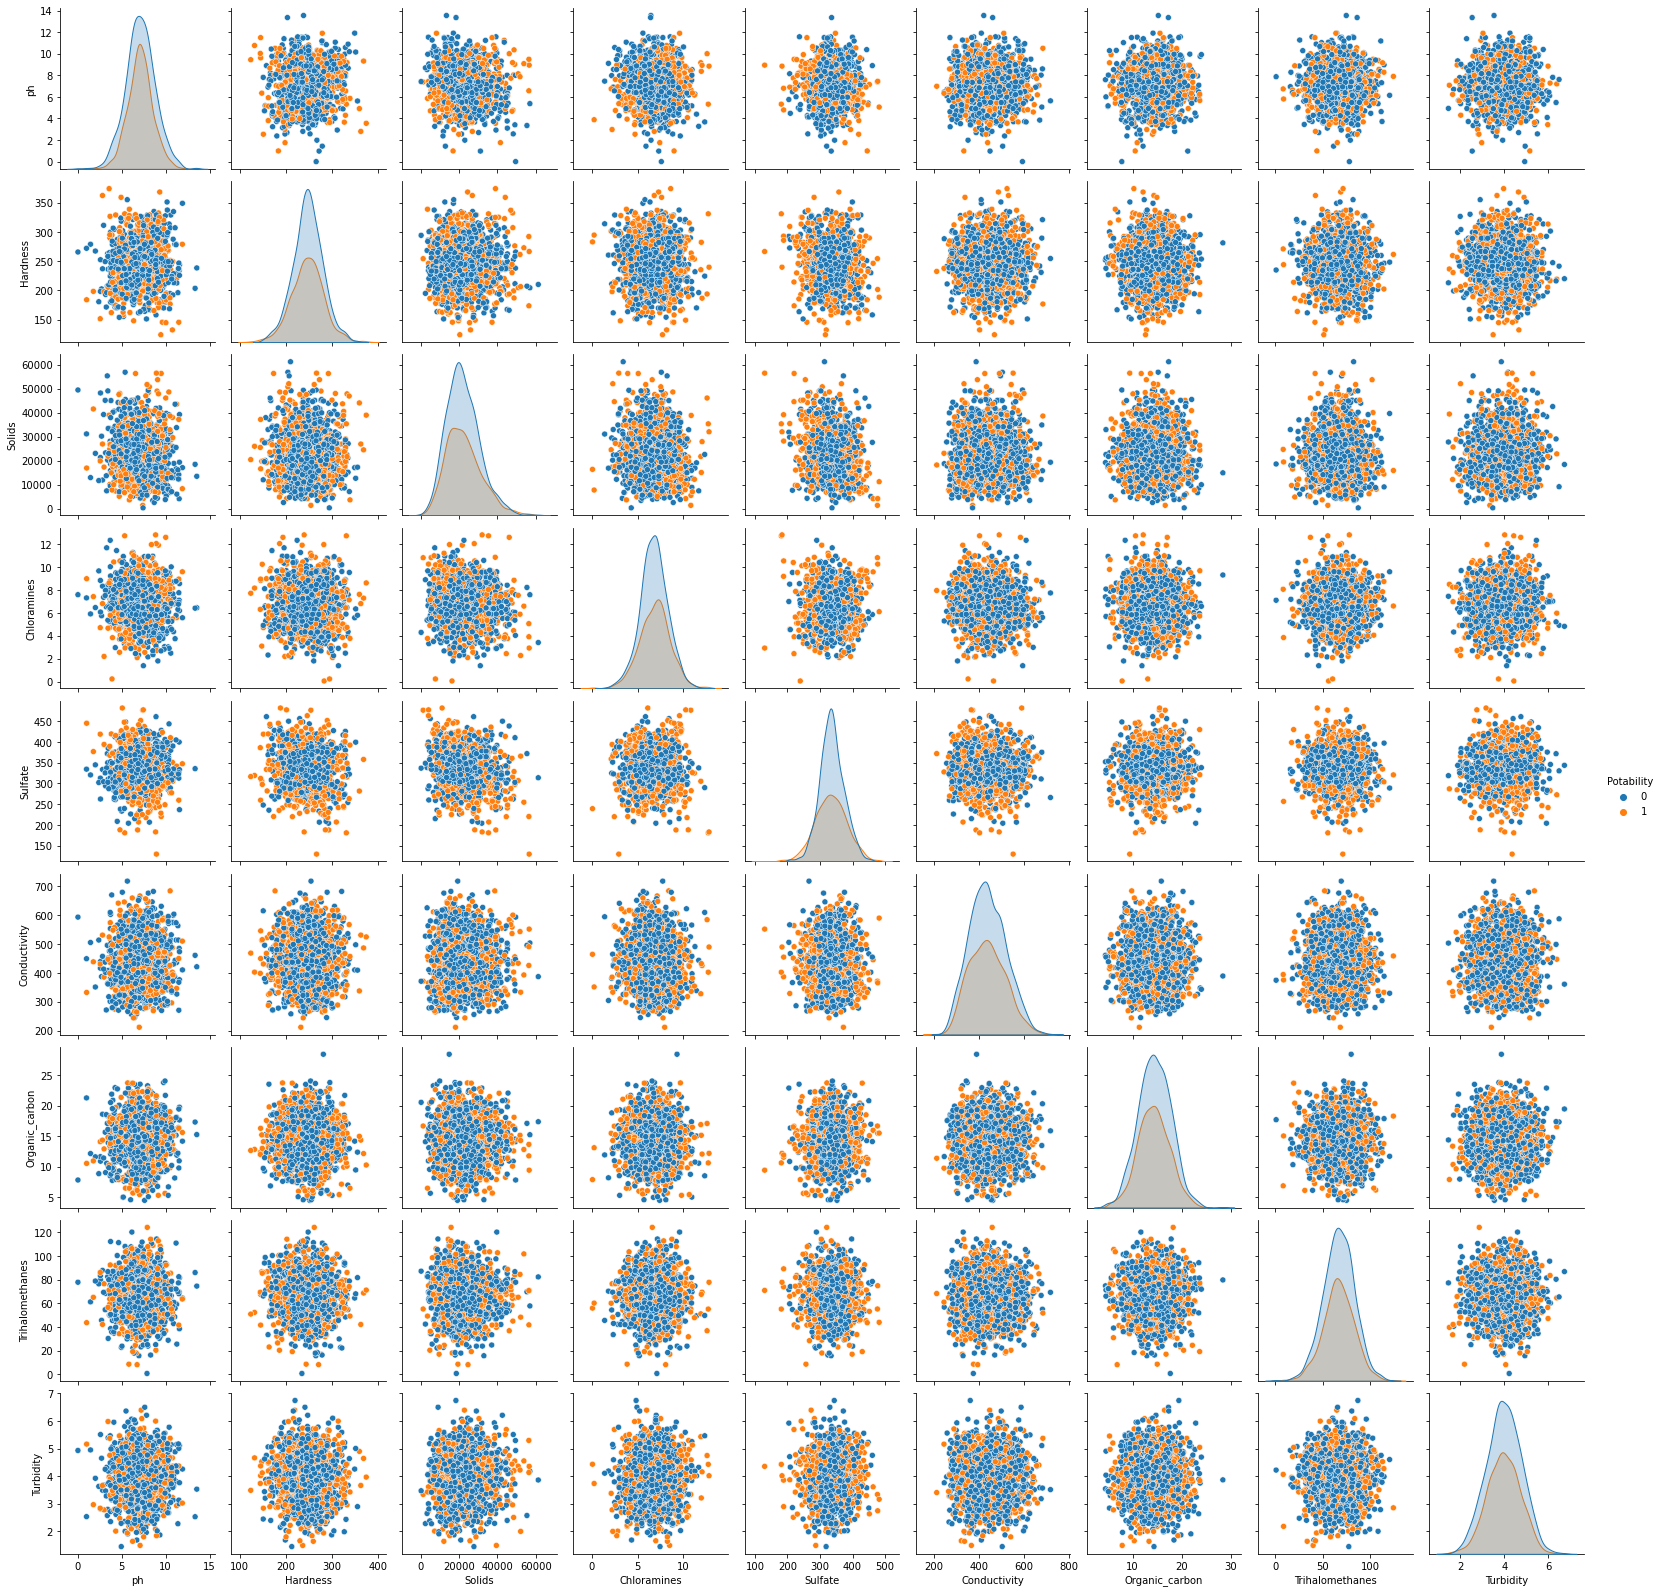

In [ ]:
sns.pairplot(data, hue='Potability')

In [ ]:
data = data.dropna()
data.isnull().sum()

region_area_       0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
cols = ['ph','Hardness','Trihalomethanes','Chloramines','Potability']
data= data[cols]

data.head()

,ph,Hardness,Trihalomethanes,Chloramines,Potability
1,4.270716,217.611599,54.589840,7.086700,0
2,6.648849,232.462013,35.411181,5.656462,0
4,9.323584,263.484560,74.669285,5.196259,0
5,4.581969,236.871806,62.438303,6.053592,0
6,7.884842,280.016551,49.919322,7.598271,0


In [ ]:
X = data.drop('Potability', axis=1)
Y = data['Potability']

X = (X - X.mean())/X.std()
X.head()

,ph,Hardness,Trihalomethanes,Chloramines
1,-1.778042,-0.887793,-0.742222,0.184568
2,-0.277100,-0.437973,-1.927768,-0.730613
4,1.411041,0.501703,0.499007,-1.025087
5,-1.581597,-0.304400,-0.257062,-0.476497
6,0.502989,1.002458,-1.030934,0.511913


In [ ]:
X.shape, Y.shape

((1383, 4), (1383,))

In [ ]:
def initialize_parameters(n_features):
        """
        Initialize model parameters.

        Parameters:
            n_features (int): The number of features in the input data.
        """
        W = np.random.randn(n_features) * 0.01
        b = 0
        parameters = {"W": W,
                  "b": b}

        return parameters

parameters = initialize_parameters(X.shape[1])

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward(features,params):
        """
        Compute the forward pass of the linear regression model.

        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predictions of shape (m,).
        """
        W = params['W']
        b = params['b']
        Z = np.dot(features, W) + b

        A = sigmoid(Z)
        return A

Y_hat = forward(X,parameters)

Y_hat

array([0.49727443, 0.4953213 , 0.5033153 , ..., 0.49682493, 0.50565584,
       0.49664538])

In [ ]:
def compute_cost(predictions, true):
        """
        Compute the mean squared error cost.

        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Returns:
            float: Mean squared error cost.
        """
        m = len(predictions)
        logprobs = - np.multiply(np.log(predictions),true) - np.multiply(np.log(1 - predictions),1 - true)
        cost = 1/m * np.sum(logprobs)
        return cost

cost = compute_cost(Y_hat, Y)
cost

0.6931810257238377

In [ ]:
def backward(predictions,true,features):
        """
        Compute gradients for model parameters.

        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Updates:
            numpy.ndarray: Gradient of W.
            float: Gradient of b.
        """
        m = len(predictions)
        dZ = predictions - true
        dW = np.dot(dZ , features) / m
        db = np.sum(dZ ) / m

        grads = {"dW": dW,
             "db": db}

        return grads

grads = backward(Y_hat, Y, X)

grads['dW']

array([-0.00251553, -0.00370961, -0.00097843, -0.01238331])

In [ ]:
def update_parameters(params, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients
    learning_rate -- learning rate parameter for gradient descent

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = params["W"]
    b = params["b"]

    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]

    # Update rule for each parameter.
    W = W - (learning_rate * dW)
    b = b - (learning_rate * db)

    parameters = {"W": W,
                  "b": b}

    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [ 0.00696462 -0.0027395   0.01379819  0.00998067]
b updated = -0.126247290899037


In [ ]:
print(f"Going by this steps we can see that the weights and bias randomly initialized as:\n{parameters}\n has now update to:\n{parameters_updated}")

Going by this steps we can see that the weights and bias randomly initialized as:
{'W': array([ 0.00394599, -0.00719103,  0.01262407, -0.0048793 ]), 'b': 0}
 has now update to:
{'W': array([ 0.00696462, -0.0027395 ,  0.01379819,  0.00998067]), 'b': -0.126247290899037}


Now let's compare the **cost function** obtained using the randomly initialized weights and bias with the one obtained using the updated weights and bias

In [ ]:
updated_Y_hat = forward(X,parameters_updated)
updated_cost = compute_cost(updated_Y_hat, Y)

print(f"The cost function obtained with the randomly initialize parameters is:\n{cost}\nWhile with the updated parameters it is reduced to:\n {updated_cost}")

The cost function obtained with the randomly initialize parameters is:
0.6931810257238377
While with the updated parameters it is reduced to:
 0.6817119262630078


As noted, our current implementation of the linear regression model involves a single loop of operations. However, it has become evident that a single loop may not suffice to reach the minimum point in most cases. Therefore, we are now integrating the aforementioned functions to enable us to execute the operations for the optimal number of loops.

In [ ]:
def logistics_regression(features, true, num_iterations=100, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration

    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """

    # Loop

        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
    parameters = initialize_parameters(X.shape[1])

    for i in range(num_iterations):

        Y_hat = forward(features,parameters)
        cost = compute_cost(Y_hat, true)
        grads = backward(Y_hat, true, features)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
parameters_simple = logistics_regression(X, Y, num_iterations=100, learning_rate=0.1, print_cost=True)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 0.693106
Cost after iteration 1: 0.691999
Cost after iteration 2: 0.690947
Cost after iteration 3: 0.689947
Cost after iteration 4: 0.688996
Cost after iteration 5: 0.688093
Cost after iteration 6: 0.687233
Cost after iteration 7: 0.686417
Cost after iteration 8: 0.685640
Cost after iteration 9: 0.684902
Cost after iteration 10: 0.684200
Cost after iteration 11: 0.683533
Cost after iteration 12: 0.682898
Cost after iteration 13: 0.682295
Cost after iteration 14: 0.681722
Cost after iteration 15: 0.681176
Cost after iteration 16: 0.680658
Cost after iteration 17: 0.680165
Cost after iteration 18: 0.679696
Cost after iteration 19: 0.679250
Cost after iteration 20: 0.678826
Cost after iteration 21: 0.678423
Cost after iteration 22: 0.678040
Cost after iteration 23: 0.677675
Cost after iteration 24: 0.677329
Cost after iteration 25: 0.676999
Cost after iteration 26: 0.676685
Cost after iteration 27: 0.676387
Cost after iteration 28: 0.676103
Cost after iteration 29:

While the model may not have been fully optimized as desired, the primary objective was to facilitate familiarity with the step-by-step implementation of the logistic regression model, as demonstrated above. Thank you for taking the time to engage with this implementation. I hope you were able to glean one or two valuable insights from this demonstration.